# Algorithm Study Week 2

## 3. Growth of Functions

### 3- 0) Three representatives notating Growth of Functions

- **O - notation** : f(n)의 Upper Bound 즉, Worst Case에서의 함수 꼴을 정의한다.

- **Ω- notation** : f(n)의 Lower Bound 즉, Best Case에서의 함수 꼴을 정의한다.

- **Θ- notation** : 앞선 두 개의 교집합으로 f(n) =O(g(n)) and f(n)= Ω(g(n))인 경우

In [5]:
from IPython.display import Image

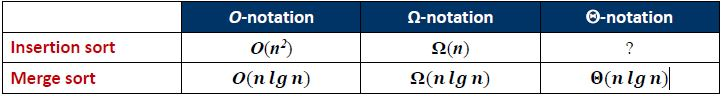

In [7]:
Image("C:/Users/study gil/Documents/캡처.jpg")

### 3-1. Θ- notation
- g(n)을 f(n) 점근적 tight bound라고 했을 때 해당 notation은 다음과 같다.

- Θ(g(n))={ f(n) : there exist positive constants c1, c2, and n0such that 0 ≤ c1· g(n) ≤ f(n) ≤ c2⋅g(n) for all n≥ n0}

- 여기서 최고차 항을 제외한 lower-order terms은 점근적 상한, 하한선을 정할 때 무시되곤 한다.

- 이에 따라 어떠한 다항식의 f(n) 에서 최고차항이 d라고 하면 Θ- notation 은 Θ(𝒏^𝒅)이 된다.


> 그 이유는 다음과 같다. Large n을 때 최고차 항만 주요하게 영향을 미치기 때문에 작은 부분의 최고차항이 나머지를 Dominate하게 됨.

### 3-2. O - notation
- g(n)을 f(n)의 점근적 tight bound라고 했을 때 해당 notation은 다음과 같다.
- O(g(n))={ f(n) : there exist positive constants cand n0such that 0 ≤ f(n) ≤ c⋅g(n) for all n≥ n0}
- 임의의 주어진 input size에서 최악의 사례의 경우를 계산하게 된다(**Upper Bound**)
- 본 notation을 사용할 때 우리는 알고리즘의 running time을 전체적인 구조를 파악함으로 알 수 있게 된다.


### 3-2.1 O - notation running time 계산
Statement이 단순한 경우 (basic operations) 각각의 실행 속도는 input size에 독립적인 상수의 값이 들고 이는 O(1)로 표현한다.
0. **Seqence of statements**: 모든 statements들의 running time의 합으로 표현한다.      total time = time(statement 1) + time(statement 2) + ... + time(statement k)
1. **IF- Then-Else** : 각 블럭의 running time의 최대값으로 표현한다.              max(time(block 1), time(block 2))
2. **Loops** : n 번 반복문이 실행되었을 때 statement의 running time 곱하기 n으로 표현한다. 즉, 반복문 안에 O(1) 이면 전체는 O(n)이 됨.
3. **Nested loops** : 2번 반복문이 중첩 되었을 때 outer loop가 n번, inner loop가 m번 실행이 된다고 하면 이는 O(N*M)
4. **Function / Procedure calls** : Statement가 함수를 호출하게 된다면 그 state의 running time은 호출되는 함수의 running time에 의해서 결정된다.


### 3-3. Ω-notation
- g(n)을 f(n)의 점근적 tight bound라고 했을 때 해당 notation은 다음과 같다.
- Ω(g(n))={ f(n) : there exist positive constants cand n0 such that 0 ≤ c⋅g(n) ≤ f(n)for all n≥ n0}
- 임의의 주어진 input size에서 최선의 사례의 running time이다(**Lower Bound**)

> Θ, O, andΩ-notation : Θ- Notation은 Lower, Upper bound의 교집합으로 표현된다. 만약 어떤 함수의 O, Ω-notation의 차원이 다른 경우(ex, insertion sort) 해당 notation은 존재하지 않는다. 

**Θ(g(n)) = O(g(n)) ∩Ω(g(n))**

## 4. Divide and Conquer 

###  Divide and Conquer Algorithm (분할정복법)

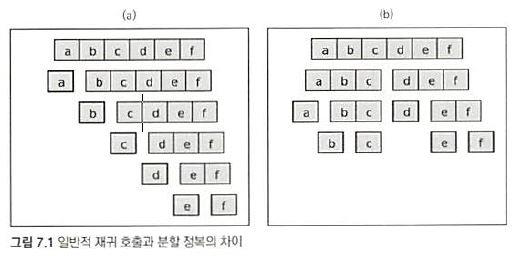

- 해결하고자 하는 문제를 둘 이상의 부분 문제로 나눈 뒤, 분할된 문제에 대한 답을 재귀 호출을 이용해 계산하고, 이를 통해 전체 문제의 답을 구하는 디자인
<br>
- 하나 vs 나머지로 나누는 일반적인 재귀함수와 달리 거의 같은 크기의 부분 문제로 나눔.
<br>
- 분할정복은 보통 세 단계로 진행된다.
    - ⓐ 분할(divide) 단계 : 해결하고자 하는 문제를 작은 크기의 동일한 문제들로 분할
    - ⓑ 정복(conquer) 단계 : 각각의 작은 문제를 동일한 방법으로 순환적(recursive)으로 해결
    - ⓒ 합정(merge) 단계 : 작은 문제의 해를 합하여(merge) 원래 문제에 대한 해를 구함  
<br>
- 분할(Divde), 병합(Merge), 곧장 풀 수 있는 작은 기저 문제 (Base case)로 구성
<br>
- 문제를 둘 이상의 부분 문제로 나누는 자연스러운 방법이 있어야 하며, 부분 문제의 답을 조합해 원래 문제의 답을 계산하는 방법이 존재해야함


## 4.1 The Maximum-Subarray Problem

본 문제는 주어진 array에서 변화의 sum을 최대로 하는 subarray를 구하는 문제이다.

> 단순하게 완전 탐색으로 문제를 풀수도 있다. 이러한 경우에는 시작과 끝 지점의 모든 조합(단, 시작 < 끝)을 구해야 한다(nC2 = 𝑛(𝑛−1)/2). 따라서 본 접근법은 Ω(𝑛^2)이 된다.

다른 접근법을 사용하기로 한다.풀이법은 다음과 같다(low, mid, high는 주어진 index 숫자)
1. **Divide** :주어진 low, mid, high에서 A[low,..mid], A[mid+1, .. high] 두가지 경우로 나누고 각각의 maximum subarray를 계산한다(**Conquer**)
2. Midpoint를 지나는 Maximum subarray를 계산한다.
3. 위 세 가지의 Largest sum을 취하는 subarray를 계산한다(**Merge**)

단, 문제에서 원래의 array를 그 전 위치의 값으로 뺀 array로 변환한다.

In [4]:
def find_max_crossing_subarray(A,low,mid,high):
    """
    Subarray 중 midpoint를 지나는 subarray 중 최대의 값을 계산하는 함수 
    """
    left_sum = float('inf') *-1
    temp = 0
    max_left = 0; max_right = 0
    for i in range(mid-1, low-2):
        temp += A[i]
        if temp > left_sum:
            left_sum = temp
            max_left = i
    right_sum = float('inf') * -1
    temp = 0
    for j in range(mid, high):
        temp += A[j]
        if temp > right_sum:
            right_sum = temp
            max_right = j
    return(max_left, max_right, left_sum+right_sum)

In [3]:
def find_maximum_subarray(A,low,high):
    # 기저 사례 : only one element
    if high==low:
        return([low-1,high-1,A[low-1]]) 
    else:
        mid = (low+high)//2 # Divide
        [left_low,left_high,left_sum] = find_maximum_subarray(A,low,mid)
        [right_low,right_high,right_sum] = find_maximum_subarray(A, mid+1, high)
        [cross_low, cross_high, cross_sum] = find_max_crossing_subarray(A,low,mid,high)
        # Conquer
        if (left_sum >= right_sum) and (left_sum >= cross_sum):
            return ([left_low, left_high, left_sum])
        elif (right_sum >= left_sum) and (right_sum >= cross_sum):
            return ([right_low, right_high, right_sum])
        else: 
            return([cross_low,cross_high,cross_sum])
        # Combine

In [5]:
# Example Data
import pandas as pd
price = pd.Series([100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 97])
ex = price-price.shift(1)
ex = list(ex[1:])
find_maximum_subarray(ex,1,16)

[3, 3, 20.0]

In [12]:
a=pd.Series([1,2,3,4,5])

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

## 4.2 Matrix Multiplication

### 4.0 무식한 방법과 Strassen’s method
- 사이즈 n인 square matrix A,B의 행렬 곱하기를 생각해보자.
- A의 각 행의 n개의 요소와 B의 각 열의 n개가 요소가 곱해진다.
- 이와 같은 방법을 n번 반복하므로 **Θ(n^3)**의 시간복잡도를 가진다.
> Strassen은 이러한 알고리즘 보다 복잡도가 살짝 개선된( O(nlog7) = O(n2.807355) )의 알고리즘을 만들었다. 그러나, 실제로 컴퓨터에서 돌리면 속도가 더 느리게 나온다는데, 이는 1) 0-Notation 앞에 엄청 큰 상수가 곱해지고 2) 따라서 더 효과적일려면 n이 엄청 커야 되기 때문이다. 이러한 이유로 현재, 사용은 잘 되지 않고 있다. 
참고 : https://m.blog.naver.com/PostView.nhn?blogId=babobigi&logNo=220502327816&proxyReferer=https:%2F%2Fwww.google.com%2F

### 4.2.1 분할정복법을 사용한 행렬의 곱 
- A는 size의 sqaure matrix임을 가정
- A^m 을 계산함에 있어서 재귀적 함수를 사용한다.
- A^m = (A^m/2) (A^m/2)인 사실을 이욯
- 홀수 인 경우에는 m-1로 해서 재귀적함수 쓰고 A를 곱하는 형식

In [138]:
import numpy as np
def matrixmul(A,m):
    if m == 0:
        return np.eye(len(a))
    if (m%2 > 0):
        return np.dot(matrixmul(A,m-1),A)
    half = matrixmul(A,m/2)
    return np.dot(half, half)

In [ ]:
1

In [139]:
# Example data a^100을 구하는데 0초(너무 짧아서 0으로 표시) 걸리는 것을 확인 
import time
start = time.time()
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
matrixmul(a,100)
print(time.time()-start)

0.0


### 4.2.2 일반적인 재귀함수 사용한 행렬의 곱 

In [134]:
def matrixmul2(A,m):
    if m == 0:
        return np.eye(len(a))
    else :
        return np.dot(matrixmul2(A,m-1),A)

In [136]:
# 똑같은 Example data a^100을 구하는데 훨씬 긴 시간이 걸리는 것을 확인
start = time.time()
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
matrixmul2(a,100)
print(time.time()-start)

0.0019598007202148438


**분할정복을 사용해서 기저사례로 도달하는 시간을 훨씬 단축할 수 있기 때문에!**
* 즉, 재귀적 함수의 시간복잡도는 지정한 기저 사례까지 도달하는데 몇번 함수가 호출되는 지가 결정하게 됨! 그리고 호출되는 개수는 분할정복 알고리즘으로 유의미하게 줄일 수 있다.

## 4-3. Three methods for solving recurrences

### 4-3.1 The substitution method  
1. 첫 번째로 T(n)에 대한 Good Guess를 추출한다 (증명해야 할 가설이 나옴)              -> 예를 들어 T(n) ≤cn lgn
2. 수학적 귀납법을 활용하여 증명을 한다. 단, 앞선 예시와 같이 lg(n)에서 n=1일 때 반드시 0이 나오는 경우 같은 문제를 해결하기 위해 제한을 건다.                              -> 예를 들어 n>=n0
3. Recurrence 식에 대체하여 넣고 T(n)을 계산한다.

> 이러한 방법론에서는 항상 **Good Guess** 을 만드는게 중요하다. 이룰 위해 recursion tree을 사용하거나,loose upper and lower bound 을 설정하고 구체화 하는 방법들이 활용된다.

### 4-3.2 The Recursion-Tree method 
1. Good Guess를 추출하는 데 자주 사용          
2. 분할 정복법에 사용되는 재귀 함수를 Level 별로 나누고 각각의 costs를 계산하여 total cost를 구한다.
3. 이후 Verify 하는 방법으로 흘러간다.

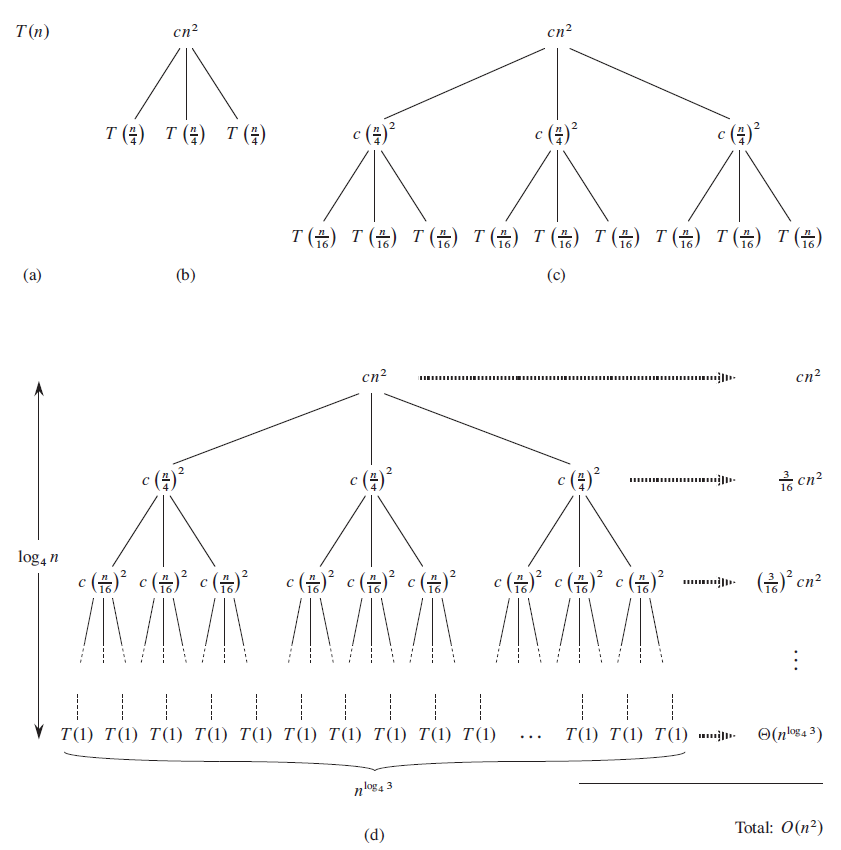

### 4-3.3 Master method 
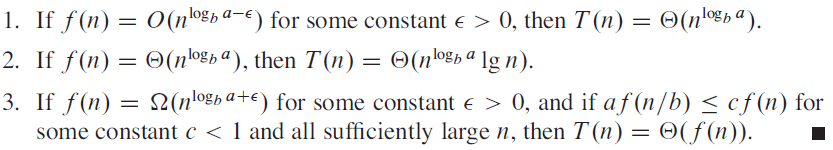

T(n) = aT(𝒏/𝒃) + f(𝒏), 즉 n/b로 나누는 것을 a번 하는 분할정복법의 경우
f(n)과 𝑛^log𝑏𝑎 를 비교하는 방법
1. f(n) < 𝑛log𝑏𝑎 & polynomially smaller => T(n) = Θ(𝑛^log𝑏𝑎).
2. f(n) = Θ(𝑛^log𝑏𝑏𝑎). => T(n) = Θ(𝑛^log𝑏𝑎 * lgn)
3. T(n) > 𝑛^log𝑏𝑎& polynomially larger & regularity condition => T(n) = Θ(𝑓 (𝑛)).

> 예를 들어 T(n)= 4T(n/2)+ n 인 경우를 생각해보자. 
a = 4, b = 2, n^logba = n^2, f(n)<= n^2 이므로 case 1이 적용된다.                      T(n) = Θ(𝑛^logb𝑎) = Θ(𝑛^2)

## 프로그래머스 코딩 (완전 탐색)

## 1. 모의고사

모의고사 문제는 3명의 수포자 중 가장 많이 맞추는 사람을 추출하는 문제이다.
- 1번 수포자는 1,2,3,4,5,1,2,3,4,5,..
   2번 수포자는 2,1,2,3,2,4,2,5,2,1,2,3,2,4,2,5,..
   3번 수포자는 3,3,1,1,2,2,4,4,5,5,3,3,1,1,2,2,4,4,5,5,..
- 시험은 **최대 10000 문제**로 구성되어 있다.
- 가장 높은 점수를 받은 사람이 여럿일 경우, return하는 값을 **오른차순으로 정렬한다**.

### 1.1 내 풀이 (14개 Test 中 2개  시간 초과)

In [8]:
import numpy as np
def solution(answers):
    n = len(answers)
    a = [1,2,3,4,5]; b=[2,1,2,3,2,4,2,5]; c= [3,3,1,1,2,2,4,4,5,5]
    while(len(c)<=n):
        a += a
        b += b
        c += c
    count1 = 0; count2 = 0; count3 = 0
    answers = np.array(answers); a = np.array(a)[:n]; b=np.array(b)[:n]; c = np.array(c)[:n]
    count1 = sum(answers-a==0)
    count2 = sum(answers-b==0)
    count3 = sum(answers-c==0)
    count = np.array([count1,count2,count3])
    answer = np.arange(1,4)
    answer = list(answer[count==max(count)])
    return answer

In [18]:
a = [1,2,3,4,5]
a = a+a
a

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [9]:
solution([1,3,2,4,2])

[1, 2, 3]

In [16]:
import numpy as np
sum(np.array([1,2,3,4,5]) == np.array([2,2,3,4,5]))

4

### 1.2 다른사람 풀이

In [14]:
def solution(answers):
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0]
    result = []

    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1

    for idx, s in enumerate(score):
        if s == max(score):
            result.append(idx+1)

    return result

In [15]:
# enumerate는 각 리스트의 index와 해당 값을 표출하는 것 = 반복문에 자주 사용
a = [1,2,3,4,5]
for idx, num in enumerate(a):
    print(idx)
    print(num)

0
1
1
2
2
3
3
4
4
5


## 2. 소수 찾기 

소수 찾기 문제는 문자열 numbers가 주어졌을 때, 종이 조각으로 만들 수 있는 소수의 개수를 구하는 문제이다.
- numbers는 길이 **1이상 7이하**인 문자열이다.
- numbers는 **0~9**까지 숫자만으로 이루어져 있다..
- 예를 들어 "013"은 0,1,3 숫자가 적힌 종이 조각이 흩어져있다는 뜻이다.

### 2.1 내 풀이

In [21]:
import itertools
def divide(number):
    """
    소수면 True, 아닌 경우에는 False를 반환하게 하도록 하는 함수 
    """
    if number <= 1:
        return False
    else: 
        for i in range(2,number):
            if number % i == 0 :
                return False
    return True

def solution(numbers):
    answer =  []
    for i in range(1,len(numbers)+1):
        temp = itertools.permutations(numbers,i) 
        # 1부터 length 까지 random permutation을 만드는 과정
        for j in list(temp):
            a = int(''.join(j))
            answer.append(a)
        # integer로 변환하고 answer에 넣음
    return sum(list(map(divide, set(answer))))

In [31]:
# Sample Data : 11, 101 두 개의 소수가 존재함 
ex = '011'


3

### 2.2 다른 사람 풀이 

In [103]:
from itertools import permutations
def solution(n):
    a = set()
    for i in range(len(n)):
        a |= set(map(int, map("".join, permutations(list(n), i + 1))))
    a -= set(range(0, 2))
    for i in range(2, int(max(a) ** 0.5) + 1):
        a -= set(range(i * 2, max(a) + 1, i))
    return len(a)

## 3. 카펫 1,2,3번 에러..

In [196]:
import math
def solution(brown, yellow):
    if math.sqrt(yellow) % 1 ==0:
        return[yellow+2, yellow+2]
    else: 
        for i in range(1,int(yellow/2+1)):
            if yellow % i == 0 :
                temp =  int(yellow / i)
                if (temp+2)*(i+2) == brown+yellow:
                    return [temp+2, i+2]

In [197]:
solution(10,2)

[4, 3]